<a href="https://colab.research.google.com/github/Darya0170/LabKZ/blob/main/lb4_OvchinnikovaDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Использование предобученной модели YOLO11

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [15]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Загрузка предобученной модели YOLOv11
model = YOLO("yolo11n.pt")

In [7]:
# Ссылка на изображение
img_path = 'https://memi.klev.club/uploads/posts/2024-04/memi-klev-club-v6jo-p-memi-dve-sobaki-i-kot-22.jpg'  # Укажите путь к вашему изображению

In [8]:
# Выполнение предсказания
results = model.predict(source=img_path, save=True)  # Сохранить результаты

100%|██████████| 222k/222k [00:00<00:00, 1.07MB/s]


image 1/1 /content/memi-klev-club-v6jo-p-memi-dve-sobaki-i-kot-22.jpg: 608x640 1 person, 1 cat, 1 dog, 41.8ms
Speed: 14.9ms preprocess, 41.8ms inference, 842.1ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict


In [10]:
# Run inference on an image with YOLO11n
# !yolo predict model=yolo11n.pt source='https://memi.klev.club/uploads/posts/2024-04/memi-klev-club-v6jo-p-memi-dve-sobaki-i-kot-22.jpg'

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 222k/222k [00:00<00:00, 1.22MB/s]
image 1/1 /content/memi-klev-club-v6jo-p-memi-dve-sobaki-i-kot-22.jpg: 608x640 1 person, 1 cat, 1 dog, 319.5ms
Speed: 10.2ms preprocess, 319.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


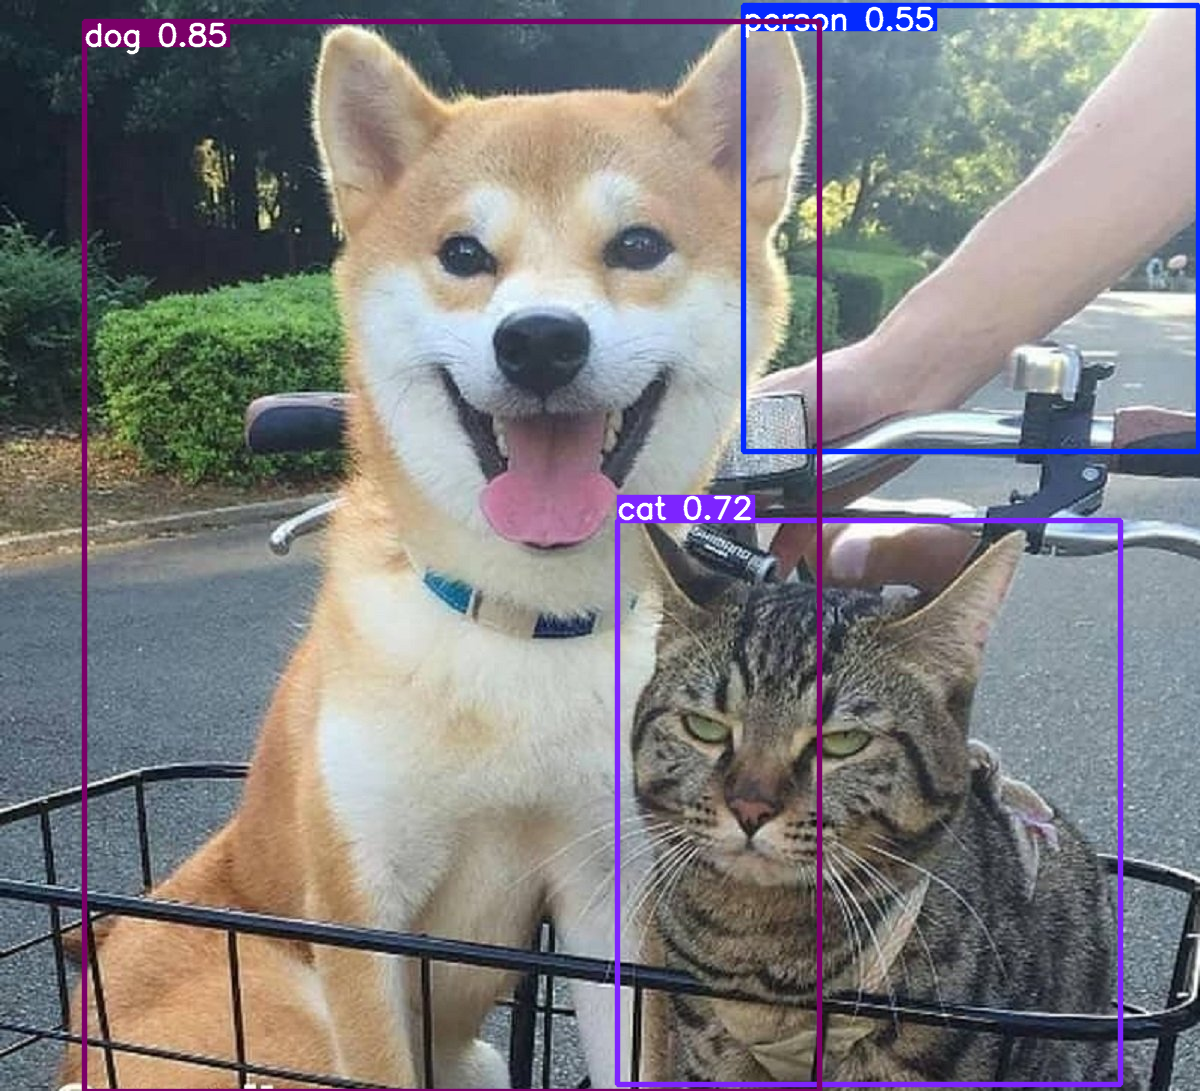

In [9]:
# Отображаем результат
for pred in results:
    pred.show()

## Обучение модели на данных о вагонах

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="17Zf4gUXJFRqCkGM392Y")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-2 in yolov11:: 100%|██████████| 4786/4786 [00:01<00:00, 2575.01it/s]


In [17]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [18]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Используемое устройство:", device)

Используемое устройство: cuda:0


In [19]:
# data.yaml
# Файл, содержащий информацию о наборе данных
# (пути к обучающим и валидационным изображениям, метаданные классов и т.д.)
from ultralytics import YOLO
# Укажите путь к загруженному набору данных
data_path = "/content/test-2/data.yaml"

# Инициализация модели YOLO (предобученная модель) - инициализировано выше
# model = YOLO('yolov11.pt')

# Начинаем обучение
model.train(data=data_path, epochs=100, verbose=False)


Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/test-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/test-2/train/labels.cache... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.19 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/test-2/valid/labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.56G      1.544      2.344      1.662         81        640: 100%|██████████| 131/131 [00:53<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]


                   all        196        901      0.724      0.302      0.344      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.47G      1.506      1.799       1.62        118        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


                   all        196        901       0.38      0.456      0.377      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.46G      1.527      1.729      1.624         90        640: 100%|██████████| 131/131 [00:48<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        196        901      0.391      0.439      0.372      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.42G      1.479      1.652      1.587        109        640: 100%|██████████| 131/131 [00:46<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        196        901      0.402      0.465      0.404      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.4G      1.465      1.579      1.566        108        640: 100%|██████████| 131/131 [00:45<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        196        901      0.707      0.407      0.429       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.4G      1.442      1.526      1.552         82        640: 100%|██████████| 131/131 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        196        901      0.454      0.488      0.435      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.4G      1.411      1.488      1.534        101        640: 100%|██████████| 131/131 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]


                   all        196        901      0.461      0.489      0.445      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G      1.376      1.443      1.502        105        640: 100%|██████████| 131/131 [00:49<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        196        901       0.48      0.471      0.452      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.4G      1.349      1.405      1.485        112        640: 100%|██████████| 131/131 [00:44<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        196        901      0.445      0.523       0.47      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.4G      1.344      1.391      1.482         89        640: 100%|██████████| 131/131 [00:47<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]


                   all        196        901      0.457      0.515      0.459       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.42G      1.322      1.359      1.466        112        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        196        901      0.441      0.524      0.462      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.42G      1.303      1.338      1.449        108        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        196        901        0.5      0.494      0.464      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.47G      1.294      1.326      1.447        110        640: 100%|██████████| 131/131 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        196        901      0.438      0.534      0.463      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.47G      1.281      1.299      1.426        105        640: 100%|██████████| 131/131 [00:46<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        196        901      0.475      0.546      0.473      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.43G      1.276      1.284      1.429         99        640: 100%|██████████| 131/131 [00:46<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        196        901      0.478      0.486      0.469      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.45G      1.267      1.289      1.428        120        640: 100%|██████████| 131/131 [00:44<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]

                   all        196        901      0.496      0.519       0.47      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.42G      1.257      1.266      1.417        114        640: 100%|██████████| 131/131 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        196        901      0.405      0.531      0.471      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.4G      1.234       1.24      1.401         99        640: 100%|██████████| 131/131 [00:43<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


                   all        196        901      0.525      0.476      0.466      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.42G      1.219      1.211      1.397         93        640: 100%|██████████| 131/131 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        196        901      0.492      0.541      0.484      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.45G      1.229      1.233      1.395         96        640: 100%|██████████| 131/131 [00:51<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        196        901      0.545      0.496      0.484      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.4G       1.22      1.229      1.402        123        640: 100%|██████████| 131/131 [00:48<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


                   all        196        901      0.512      0.482      0.466      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.45G       1.21      1.187      1.383        113        640: 100%|██████████| 131/131 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        196        901      0.461      0.549      0.485        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.47G      1.192       1.18      1.373        118        640: 100%|██████████| 131/131 [00:49<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        196        901      0.486      0.539       0.47      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.43G      1.186      1.159      1.364        120        640: 100%|██████████| 131/131 [00:46<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        196        901      0.458      0.512      0.472      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.46G      1.179       1.17      1.369         87        640: 100%|██████████| 131/131 [00:50<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


                   all        196        901      0.451       0.53      0.474      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.53G      1.169       1.14       1.35         80        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        196        901      0.468      0.535      0.469      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.42G      1.159      1.147      1.351        116        640: 100%|██████████| 131/131 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        196        901      0.461       0.52      0.463      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.42G      1.155      1.129      1.336        131        640: 100%|██████████| 131/131 [00:50<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        196        901      0.438      0.494      0.457      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.45G       1.13      1.107       1.33         92        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


                   all        196        901      0.422      0.522      0.456       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.46G      1.143      1.098      1.334        116        640: 100%|██████████| 131/131 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        196        901      0.499      0.498      0.477       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.46G      1.124      1.079      1.324         91        640: 100%|██████████| 131/131 [00:47<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


                   all        196        901      0.461      0.534      0.481      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.45G      1.119      1.077      1.323        107        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        196        901      0.486      0.488      0.473      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.5G      1.114      1.063      1.314        106        640: 100%|██████████| 131/131 [00:48<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


                   all        196        901       0.49      0.556      0.487      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.47G      1.118      1.062      1.313        106        640: 100%|██████████| 131/131 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


                   all        196        901      0.451      0.544      0.468       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.4G      1.089      1.036      1.295         75        640: 100%|██████████| 131/131 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        196        901      0.443      0.536      0.452      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.42G      1.097      1.034      1.296        122        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


                   all        196        901      0.411        0.5      0.441      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.46G      1.087      1.035      1.298         98        640: 100%|██████████| 131/131 [00:47<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        196        901      0.479      0.522      0.465      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.43G      1.076      1.027      1.295        106        640: 100%|██████████| 131/131 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        196        901      0.485      0.499       0.47      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.41G      1.077      1.013      1.287         86        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        196        901      0.474      0.516      0.466      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.48G      1.065      1.002      1.283         83        640: 100%|██████████| 131/131 [00:49<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        196        901      0.474      0.517      0.463      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.45G       1.07     0.9931      1.275        125        640: 100%|██████████| 131/131 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


                   all        196        901      0.481       0.48      0.453      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.41G      1.054     0.9759      1.269        128        640: 100%|██████████| 131/131 [00:47<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        196        901      0.438      0.562      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G      1.046     0.9777      1.273        113        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        196        901      0.525      0.459      0.453      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.44G      1.048       0.97      1.267        121        640: 100%|██████████| 131/131 [00:47<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        196        901      0.469      0.512      0.477      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.47G       1.05     0.9716      1.278        109        640: 100%|██████████| 131/131 [00:46<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        196        901      0.486      0.519      0.484      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.43G      1.043     0.9656      1.267         92        640: 100%|██████████| 131/131 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        196        901      0.492       0.48       0.46      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.43G      1.031     0.9409      1.261         98        640: 100%|██████████| 131/131 [00:47<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        196        901      0.444      0.532      0.445       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.42G       1.02     0.9304      1.253        118        640: 100%|██████████| 131/131 [00:44<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        196        901      0.448       0.54      0.455      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.43G      1.009     0.9147      1.239         92        640: 100%|██████████| 131/131 [00:47<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        196        901      0.466      0.501       0.45      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.45G      1.015     0.9242      1.241         74        640: 100%|██████████| 131/131 [00:44<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]


                   all        196        901      0.502      0.462      0.459      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.5G     0.9918     0.8943      1.239        124        640: 100%|██████████| 131/131 [00:46<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        196        901      0.467       0.49      0.442      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.45G     0.9952      0.899      1.236         80        640: 100%|██████████| 131/131 [00:44<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


                   all        196        901      0.491      0.489      0.445      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.4G     0.9907     0.8998      1.229         99        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        196        901      0.464       0.54       0.46      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.46G     0.9827     0.8853      1.228        101        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        196        901      0.453      0.458      0.437      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.5G     0.9853     0.8748      1.231        107        640: 100%|██████████| 131/131 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        196        901      0.516      0.487      0.469      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.52G     0.9689     0.8612       1.22        124        640: 100%|██████████| 131/131 [00:47<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


                   all        196        901      0.452      0.498      0.458      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.41G     0.9668     0.8598      1.218        126        640: 100%|██████████| 131/131 [00:44<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        196        901      0.516      0.441      0.449      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.47G     0.9792     0.8736      1.225        104        640: 100%|██████████| 131/131 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        196        901      0.481      0.498      0.461       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.44G      0.959     0.8422      1.213         92        640: 100%|██████████| 131/131 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]

                   all        196        901      0.446      0.525      0.458      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.9638     0.8417      1.215        102        640: 100%|██████████| 131/131 [00:45<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


                   all        196        901      0.456      0.509      0.458      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.47G     0.9527     0.8309        1.2        110        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        196        901      0.478      0.521      0.465      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.48G     0.9407     0.8242      1.198         90        640: 100%|██████████| 131/131 [00:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        196        901      0.438       0.52      0.451      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.43G     0.9421     0.8183      1.194        134        640: 100%|██████████| 131/131 [00:44<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        196        901      0.485      0.471      0.447      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.42G     0.9313     0.8143       1.19        127        640: 100%|██████████| 131/131 [00:48<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        196        901        0.5      0.503      0.467      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.4G     0.9324     0.8051      1.192        111        640: 100%|██████████| 131/131 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


                   all        196        901      0.446      0.535      0.452      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.47G       0.93     0.8085      1.194        102        640: 100%|██████████| 131/131 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        196        901      0.479      0.474      0.439      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.46G     0.9145     0.7903      1.177         92        640: 100%|██████████| 131/131 [00:46<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        196        901      0.456      0.516      0.461      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.45G     0.9284     0.8079      1.195        100        640: 100%|██████████| 131/131 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all        196        901      0.534      0.454      0.465      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.42G     0.9059     0.7657      1.168        113        640: 100%|██████████| 131/131 [00:46<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


                   all        196        901      0.482      0.498      0.456      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.47G      0.917     0.7943      1.188         68        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        196        901      0.483       0.49      0.446      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.53G      0.888     0.7596      1.162         99        640: 100%|██████████| 131/131 [00:47<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


                   all        196        901      0.443      0.501      0.446      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.42G     0.8968      0.763       1.17        121        640: 100%|██████████| 131/131 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]

                   all        196        901      0.524      0.468      0.456      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.4G     0.8926     0.7556      1.159         98        640: 100%|██████████| 131/131 [00:48<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        196        901      0.459      0.492       0.44      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.41G     0.8885     0.7559      1.162        111        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        196        901      0.478      0.504      0.458      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.46G      0.879     0.7477      1.155         91        640: 100%|██████████| 131/131 [00:49<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        196        901      0.482      0.482      0.442      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.42G     0.8832     0.7388      1.155        119        640: 100%|██████████| 131/131 [00:44<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        196        901       0.47      0.488      0.457      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.47G     0.8818     0.7389      1.159         96        640: 100%|██████████| 131/131 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        196        901      0.534      0.423      0.446      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.45G     0.8639     0.7334      1.158         94        640: 100%|██████████| 131/131 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


                   all        196        901      0.507      0.487      0.457      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.45G     0.8747     0.7304      1.149        115        640: 100%|██████████| 131/131 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        196        901      0.472      0.505      0.455      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.42G     0.8522     0.7247      1.142         88        640: 100%|██████████| 131/131 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        196        901      0.488      0.496      0.451      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.41G     0.8599     0.7212      1.146         93        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        196        901      0.481      0.485       0.45      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.41G     0.8374     0.6988      1.131         87        640: 100%|██████████| 131/131 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        196        901      0.527       0.44      0.448      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.39G     0.8314     0.6973      1.129        105        640: 100%|██████████| 131/131 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


                   all        196        901      0.483      0.502      0.449      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.45G     0.8437     0.6982      1.133         87        640: 100%|██████████| 131/131 [00:48<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]

                   all        196        901      0.507      0.473      0.455      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.4G     0.8399     0.6978      1.134        104        640: 100%|██████████| 131/131 [00:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]


                   all        196        901      0.496      0.495      0.446      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.43G     0.8336     0.6906      1.128         80        640: 100%|██████████| 131/131 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        196        901      0.473      0.488      0.442      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.45G     0.8315     0.6833      1.126        114        640: 100%|██████████| 131/131 [00:46<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


                   all        196        901      0.486      0.481      0.444      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.42G     0.8161     0.6792      1.115         89        640: 100%|██████████| 131/131 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        196        901      0.471      0.499      0.447      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.43G     0.8034     0.6751      1.114         93        640: 100%|██████████| 131/131 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        196        901      0.497      0.496      0.447      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.46G     0.8137     0.6725      1.123         91        640: 100%|██████████| 131/131 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        196        901      0.499      0.488      0.444      0.281


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.53G      0.788     0.5911      1.104         56        640: 100%|██████████| 131/131 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        196        901       0.44      0.528       0.44      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.39G     0.7706     0.5681      1.091         48        640: 100%|██████████| 131/131 [00:44<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        196        901      0.513      0.463      0.441      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.39G     0.7592     0.5569      1.086         52        640: 100%|██████████| 131/131 [00:47<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        196        901      0.493      0.499      0.441      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.39G     0.7496     0.5489      1.075         57        640: 100%|██████████| 131/131 [00:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]

                   all        196        901      0.499      0.487      0.439      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.37G     0.7436     0.5358      1.072         46        640: 100%|██████████| 131/131 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        196        901      0.487      0.497      0.442      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.39G     0.7431     0.5481      1.075         55        640: 100%|██████████| 131/131 [00:44<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        196        901      0.465      0.512      0.442      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.39G     0.7316     0.5273      1.066         53        640: 100%|██████████| 131/131 [00:45<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        196        901      0.482      0.507       0.44      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.39G     0.7283     0.5293       1.07         66        640: 100%|██████████| 131/131 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]

                   all        196        901      0.481      0.474      0.435      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.4G     0.7257     0.5266      1.065         55        640: 100%|██████████| 131/131 [00:44<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        196        901      0.484      0.483      0.436       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.39G     0.7171     0.5176      1.053         47        640: 100%|██████████| 131/131 [00:47<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        196        901      0.502       0.46      0.438      0.282



100 epochs completed in 1.398 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        196        901      0.486      0.519      0.484      0.307
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9090c08dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Загрузка результатов обучения
results_df = pd.read_csv('runs/detect/train4/results.csv')


In [22]:
results_df.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   60.6725         1.54432         2.34398         1.66202   
1      2  111.1400         1.50621         1.79870         1.61983   
2      3  162.3860         1.52721         1.72947         1.62438   
3      4  213.6130         1.47886         1.65237         1.58667   
4      5  261.9340         1.46518         1.57910         1.56649   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.72386            0.30235           0.34362   
1               0.37953            0.45640           0.37696   
2               0.39098            0.43881           0.37174   
3               0.40215            0.46471           0.40446   
4               0.70686            0.40671           0.42909   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.18354       1.69151       2.15654       1.88116  0.000473   
1              0.20622       1.70832       1.93847       1.94831  0.000940   
2              0.19475       1.80287       1.92611       1.91884  0.001397   
3              0.21345       1.68345       1.69122       1.86252  0.001387   
4              0.23986       1.59961       1.59714       1.75421  0.001372   

     lr/pg1    lr/pg2  
0  0.000473  0.000473  
1  0.000940  0.000940  
2  0.001397  0.001397  
3  0.001387  0.001387  
4  0.001372  0.001372

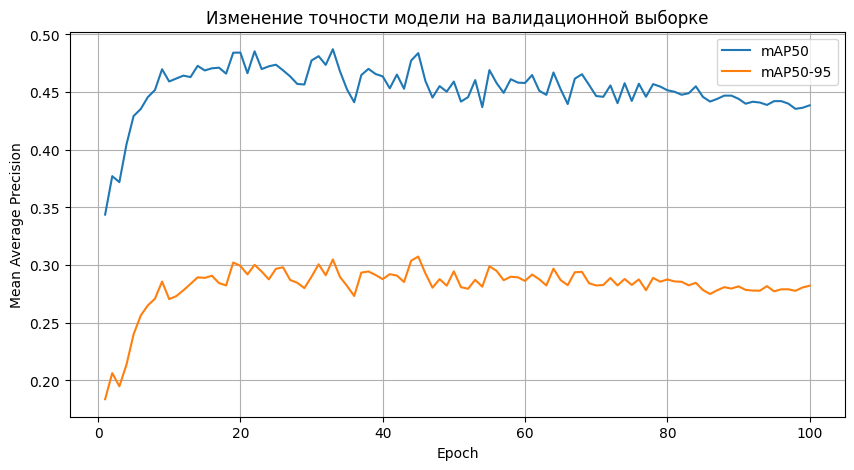

In [23]:
# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision')
plt.title('Изменение точности модели на валидационной выборке')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Загрузка модели
model = YOLO('runs/detect/train4/weights/best.pt')

# Выгрузка лучшей модели
model.export(format='onnx')

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success ✅ 2.2s, saved as 'runs/detect/train4/weights/best.onnx' (10.1 MB)

Export complete (4.4s)
Results saved to /content/runs/detect/train4/weights
Predict:         yolo predict task=detect model=runs/detect/train4/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train4/weights/best.onnx imgsz=640 data=/content/test-2/data.yaml  
Visualize:       https://netron.app


'runs/detect/train4/weights/best.onnx'

## Загрузка лучшей модели и предсказания

In [26]:
# Печать формы и содержимого для диагностики
print("форма outputs:", np.array(outputs).shape)
print("вывод модели:", outputs[0])

форма outputs: (1, 1, 7, 8400)
вывод модели: [[[     16.749      18.717      26.146 ...      543.77      587.28      617.87]
  [     12.734      9.8786      10.974 ...       610.6      607.33      603.04]
  [     93.345      90.221      81.452 ...      244.02      218.69      207.03]
  ...
  [ 1.9372e-06  4.2319e-06  3.4571e-06 ...  8.3357e-05  7.0095e-05  9.3877e-05]
  [ 2.0862e-06   2.414e-06  1.4007e-06 ...  4.3631e-05  4.3184e-05  5.9426e-05]
  [ 3.3379e-06  4.7386e-06  2.1756e-06 ...  8.8573e-05  8.1062e-05  0.00013655]]]



image 1/1 /content/test-2/test/images/i1PEXZUAW_jpg.rf.a602e05dd291b5e28c390cfdb2309576.jpg: 640x640 1 body, 2 wheelss, 18.9ms
Speed: 2.1ms preprocess, 18.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


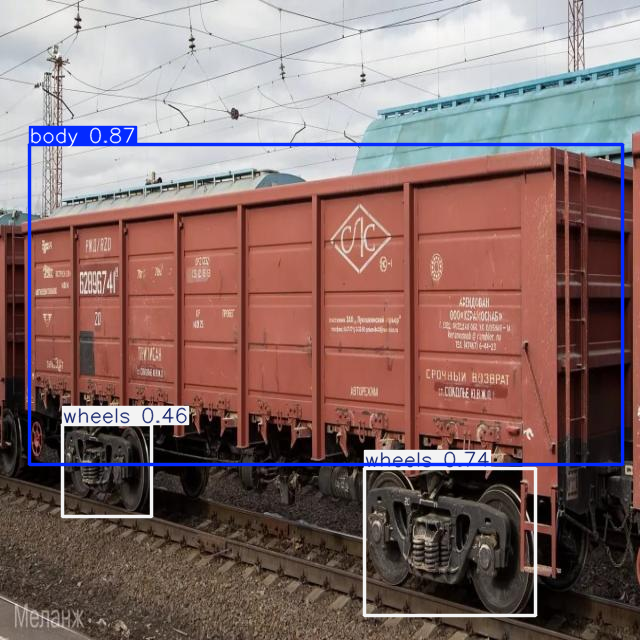


image 1/1 /content/test-2/test/images/1441863457general_pages_10_September_2015_i28465_dva_brata_vskryli_vagon_s_jpg.rf.9d9a41a2e7b9157ca9d90d8d8fb5d4c8.jpg: 640x640 1 body, 2 wheelss, 21.3ms
Speed: 2.1ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


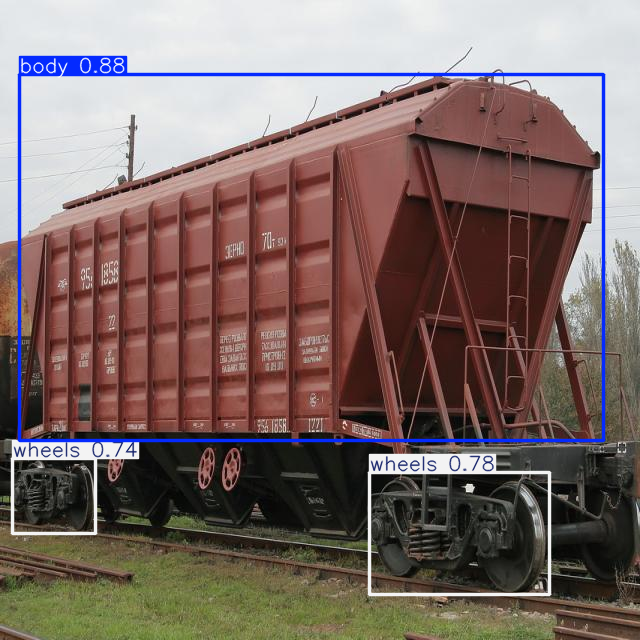


image 1/1 /content/test-2/test/images/442bc_jpeg_jpg.rf.cb04e79225dbf6906b9514062a756ff4.jpg: 640x640 1 body, 1 wheels, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


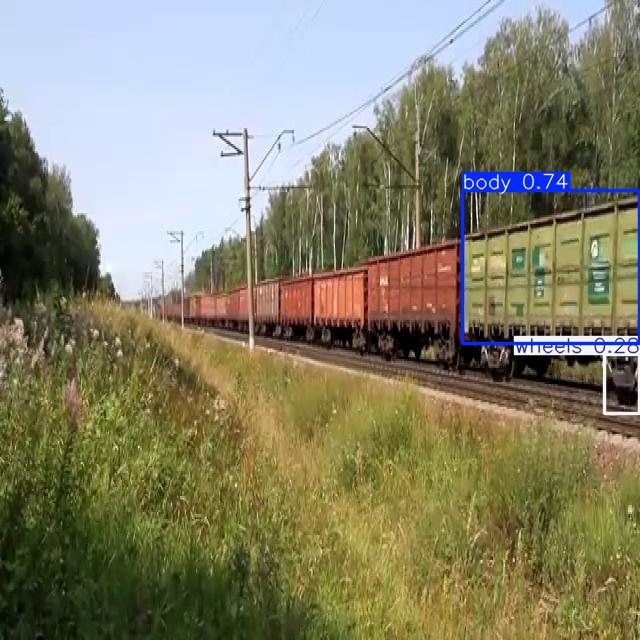


image 1/1 /content/test-2/test/images/vagon_0602b_jpg.rf.a5b49b2e4252c6ff1b3f2f4b1095a881.jpg: 640x640 2 bodys, 1 coupling, 3 wheelss, 19.4ms
Speed: 2.1ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


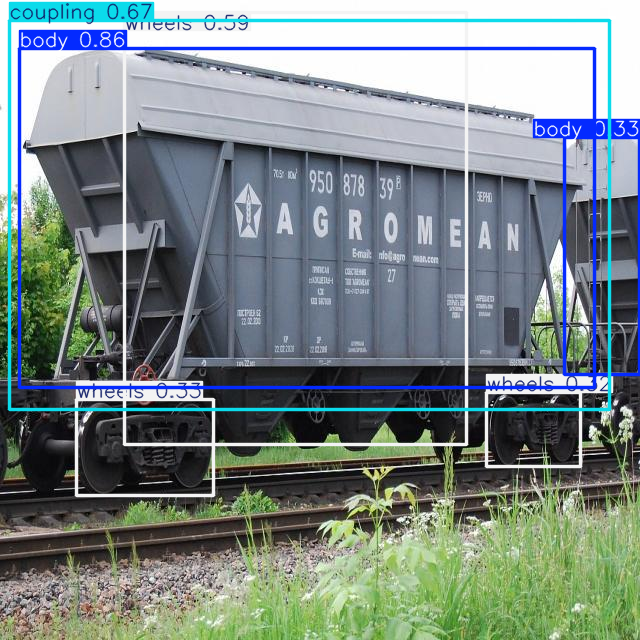


image 1/1 /content/test-2/test/images/456bc_jpeg_jpg.rf.a1ac7790054b17457115be600713b52c.jpg: 640x640 1 body, 1 wheels, 13.9ms
Speed: 2.3ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


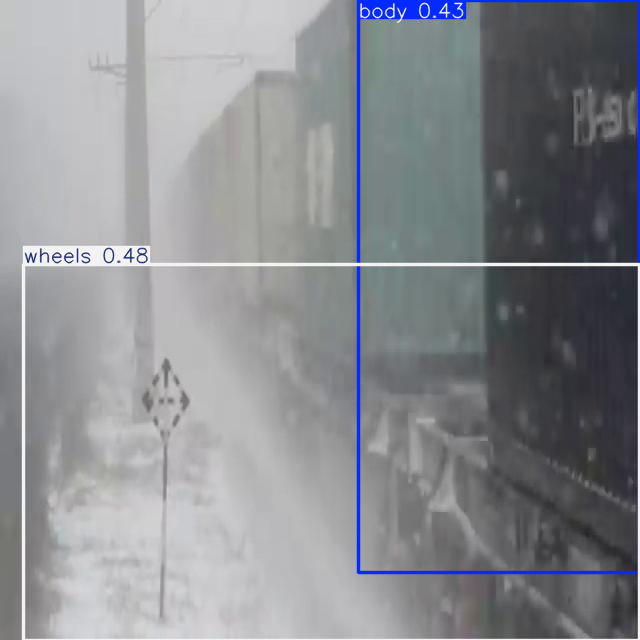

In [27]:
import cv2
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt
import os
import random

# Загрузка модели
model_path = 'runs/detect/train4/weights/best.pt'
model = YOLO(model_path)

# Путь к папке с изображениями
image_folder = '/content/test-2/test/images'  # Укажите ваш путь к папке с изображениями
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Выбираем 5 случайных изображений
random_images = random.sample(image_files, 5)

#  Обработка случайных изображений
for img_file in random_images:

#     # Выполнение предсказания
    results = model.predict(source=f'/content/test-2/test/images/{img_file}', save=True)

    for pred in results:
      pred.show()
